In [16]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import fma.utils as utils
from time import time

plt.rcParams['figure.figsize'] = (17, 5)

## 1. load metadata and features (FMA dataset)

In [17]:
# Load metadata and features.
tracks = utils.load('fma/data/fma_metadata/tracks.csv')
genres = utils.load('fma/data/fma_metadata/genres.csv')
features = utils.load('fma/data/fma_metadata/features.csv')
echonest = utils.load('fma/data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [3]:
## tracks

In [18]:
ipd.display(tracks['track'].head())
ipd.display(tracks['set'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


In [19]:
# get small dataset
small = tracks[tracks['set', 'subset'] <= 'small']
small.shape

(8000, 52)

In [20]:
## featurs using only MFCC

In [21]:
print('{1} features for {0} tracks'.format(*features['mfcc'].shape))
ipd.display(features['mfcc'].head().style.format('{:.2f}'))

140 features for 106574 tracks


## 2. Dimension reduction
- random projection
- PCA
- isomap
- LLE
- modified LLE
- MDS
- random forest
- spectral
- t-SNE
- NCA

In [22]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

In [23]:
## using fma small dataset 
## genre is used label for visulaization
small = tracks['set', 'subset'] <= 'small'
X = features.loc[small, 'mfcc']
y = tracks.loc[small,('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

X.shape, y.shape

((8000, 140), (8000,))

In [27]:
X.head()

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
5           2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10          5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
140         0.384906  1.203378  0.429393  0.639471 -0.080144 -0.440946   
141        -0.038922  4.771146 -0.378949 -0.309047 -0.661308 -0.531602   

statistics                                          ...        std            \
number            07        08        09        10  ...         11        12   
track_id                                            ...                        
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609  8.601942   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638  9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734  7.985110   
140        -0.432567 -0.126163  0.507695  0.408915  ...   9.883532  8.250456   
141         0.029186  0.662524 -0.084562  0.965640  ...   9.464321  8.119837   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
140         8.085891  8.114858  8.832722  8.157245  7.297486  7.734456   
141         8.918522  8.059117  9.339061  8.451561  8.426965  8.341757   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
5           8.452527  7.334442  
10          6.430473  6.186294  
140         7.807103  7.986255  
141         8.572934  9.351485  

[5 rows x 140 columns]

In [28]:
# get track_id in X
x_track_id = X.index.values.tolist()
x_track_id[:10]

[2, 5, 10, 140, 141, 148, 182, 190, 193, 194]

In [62]:
from matplotlib import offsetbox

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing random projection
Computing PCA projection
Computing Isomap projection
Done.
Computing LLE embedding
Done. Reconstruction error: 1.18379e-17
Computing modified LLE embedding


/home/super/.pyenv/versions/3.8.0/envs/venv_py38/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:423: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/home/super/.pyenv/versions/3.8.0/envs/venv_py38/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:433: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/home/super/.pyenv/versions/3.8.0/envs/venv_py38/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:441: RuntimeWarning: invalid value encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/home/super/.pyenv/versions/3.8.0/envs/venv_py38/lib/python3.8/site-packages/sklearn/manifold/_locally_linear.py:454: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


Done. Reconstruction error: 1.48882e-05
Computing MDS embedding
Done. Stress: 111491137369.875793
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding
Computing NCA projection


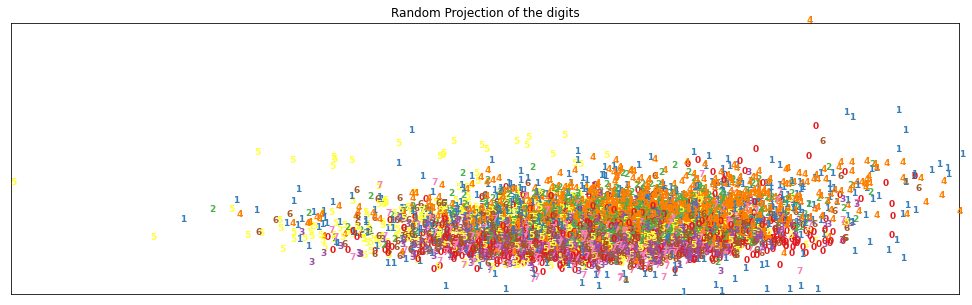

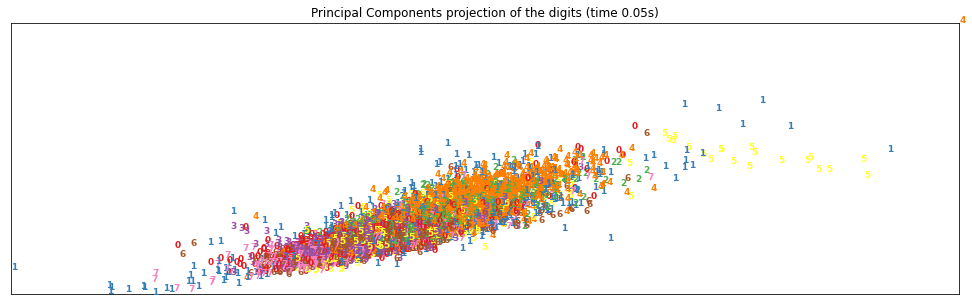

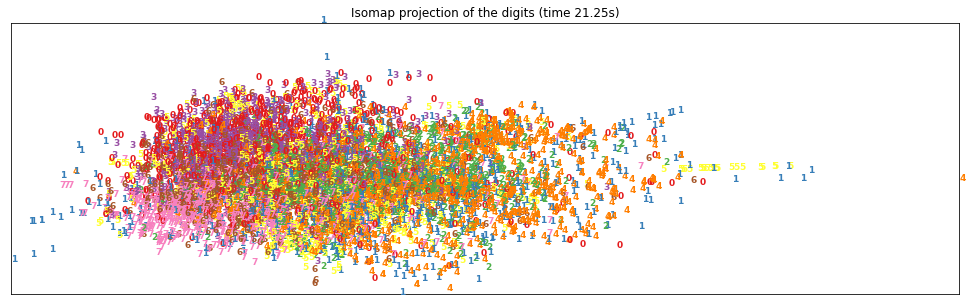

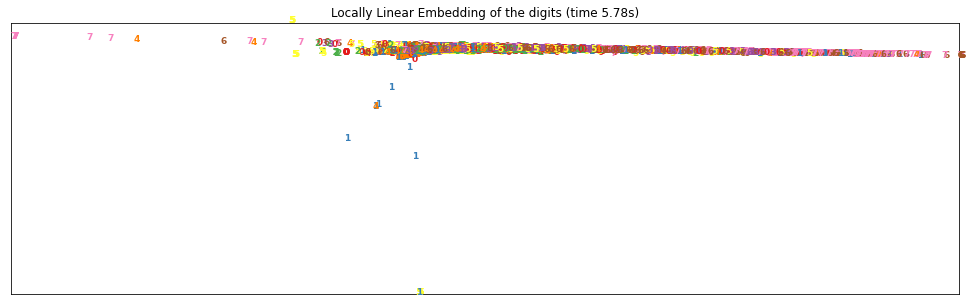

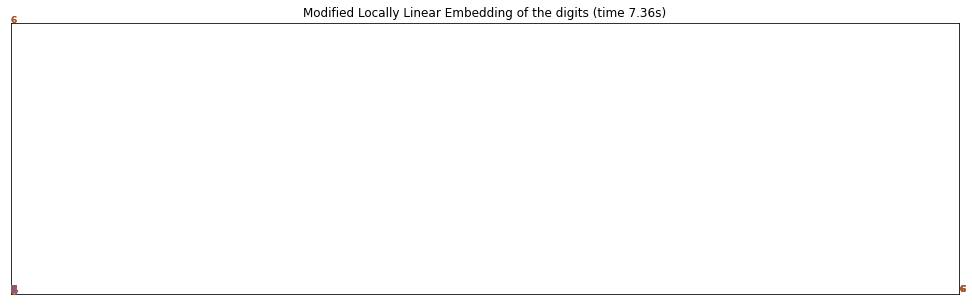

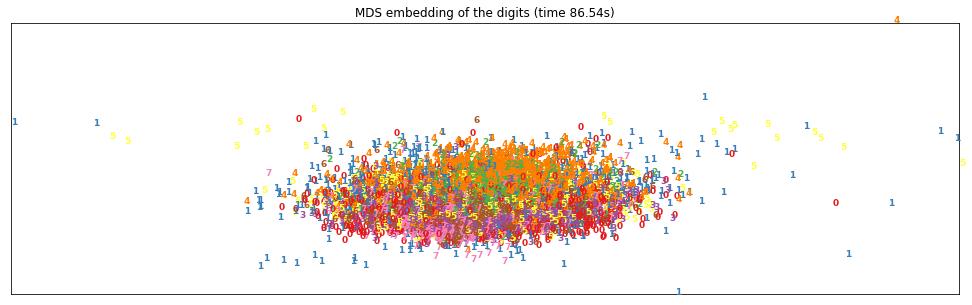

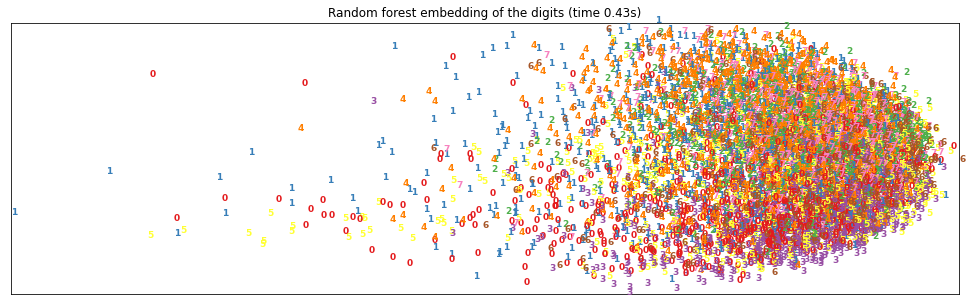

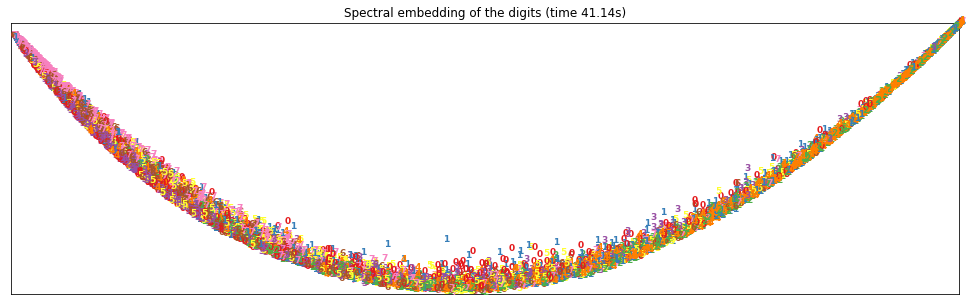

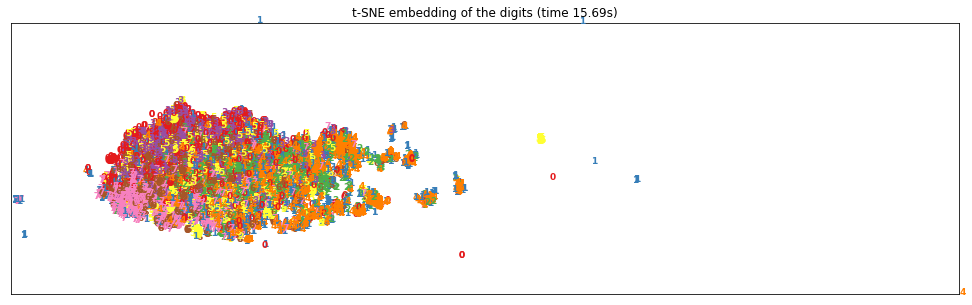

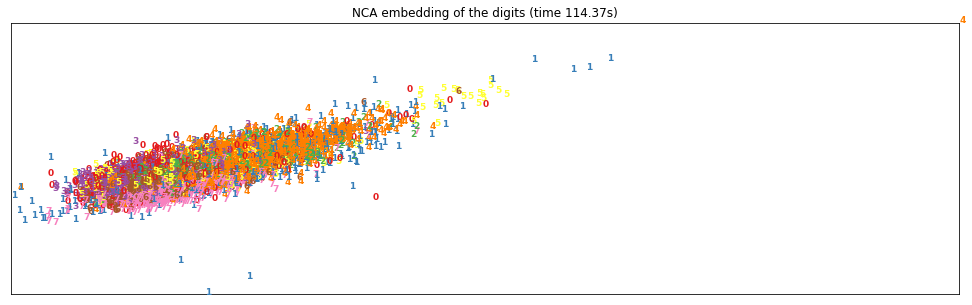

In [32]:
n_neighbors = 3
# ----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

# ----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2
                        ).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))

# # ----------------------------------------------------------------------
# # HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# ----------------------------------------------------------------------
# # LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

# ----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

# ----------------------------------------------------------------------
# NCA projection of the digits dataset
print("Computing NCA projection")
nca = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0)
t0 = time()
X_nca = nca.fit_transform(X, y)

plot_embedding(X_nca,
               "NCA embedding of the digits (time %.2fs)" %
               (time() - t0))


plt.show()

In [63]:
## 3D test

Computing PCA projection


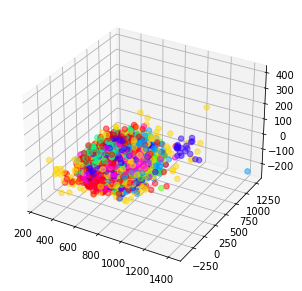

In [23]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_xlim3d(0, 1000)
# ax.set_ylim3d(0, 1000)
# ax.set_zlim3d(0, 1000)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c = y, s= 30, alpha=0.5, cmap=plt.cm.hsv)
plt.show()

## 3. Clustering
- Affinity Propagation by PCA, Isomap
- random sampling
- + K-means (k = num of clusters by AP) 

In [30]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
X_pca.shape
print(X_pca[:5])

Computing PCA projection
[[ 687.56963716  -97.32084546]
 [ 728.05009549  -18.101881  ]
 [ 702.13556103 -126.09072644]
 [ 761.27902321  -15.17962056]
 [ 786.30758366   44.97248237]]


In [31]:
X_iso = manifold.Isomap(n_neighbors=3, n_components=2
                        ).fit_transform(X)
print("Done.")

Done.


In [32]:
print(X_iso[:5])

[[-299.32672416   84.42567296]
 [ -10.47492415   61.51551495]
 [-351.77098908 -176.27369973]
 [ 133.13753163    6.30768482]
 [ 242.35736322   47.42613185]]


In [33]:
## Clustering

In [34]:
#AP

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
t0 = time()
af_pca = AffinityPropagation(random_state=0).fit(X_pca[:500])
af_iso = AffinityPropagation(random_state=0).fit(X_iso[:500])
cluster_centers_indices_pca = af_pca.cluster_centers_indices_
cluster_centers_indices_iso = af_iso.cluster_centers_indices_
labels_pca = af_pca.labels_
labels_iso = af_iso.labels_

n_clusters_pca = len(cluster_centers_indices_pca)
n_clusters_iso = len(cluster_centers_indices_iso)
print(n_clusters_pca, n_clusters_iso)

21 23


In [17]:
print(af.cluster_centers_)

[[ 786.30758366   44.97248237]
 [ 875.28656051  147.40235035]
 [ 620.8882691  -207.06634033]
 [ 729.73074578   -6.57929204]
 [ 737.77869648  -80.03327058]
 [ 670.60044665 -167.07154173]
 [ 697.45371048  -64.92610081]
 [ 967.67964252  288.14935268]
 [ 635.89677122 -104.66228843]
 [ 469.86664149 -338.50984309]
 [ 748.92541018   42.08040023]
 [ 814.55169529  108.58172238]
 [ 831.08770967  231.77274613]
 [ 698.75943844 -117.96829828]
 [ 899.86578418  219.08133857]
 [ 560.70481939 -261.59650204]
 [ 792.04699985    1.50534392]
 [ 781.84014259  -42.14770416]
 [ 807.80489394  156.08595713]
 [ 723.10430805  107.33607189]
 [ 693.99118402    5.27063097]]


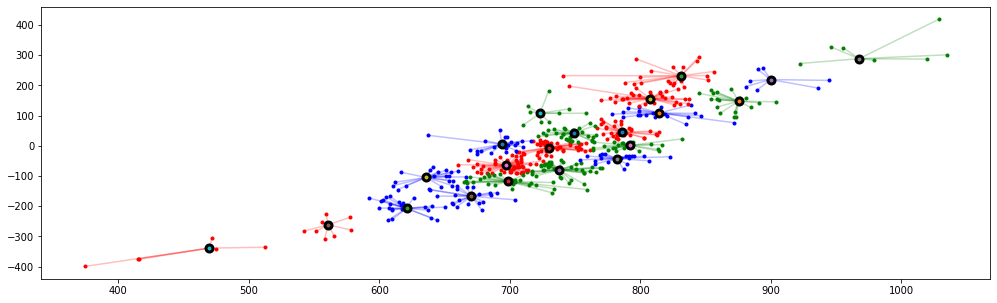

In [22]:
## AP by PCA
from itertools import cycle
import matplotlib.pyplot as plt

colors = cycle('rgb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_pca == k
    cluster_center = X_pca[:500][cluster_centers_indices_pca[k]]
    plt.plot(X_pca[:500][class_members, 0], X_pca[:500][class_members, 1], col + '.')
    for x in X_pca[:500][class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()

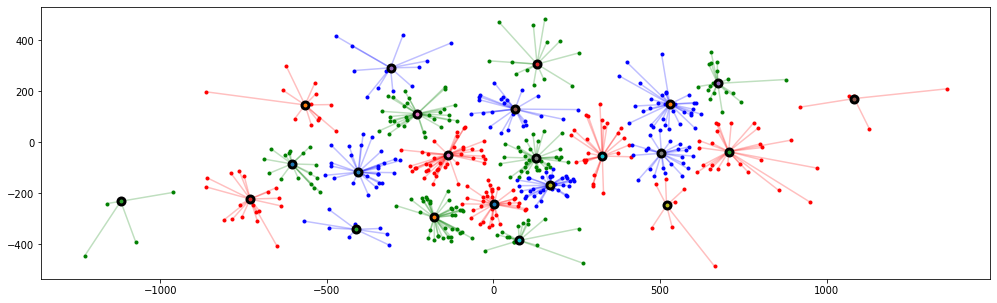

In [36]:
## AP by Isomap
from itertools import cycle
import matplotlib.pyplot as plt

colors = cycle('rgb')
for k, col in zip(range(n_clusters_iso), colors):
    class_members = labels_iso == k
    cluster_center = X_iso[:500][cluster_centers_indices_iso[k]]
    plt.plot(X_iso[:500][class_members, 0], X_iso[:500][class_members, 1], col + '.')
    for x in X_iso[:500][class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()

In [40]:
# check label and genre
label = af_iso.labels_
for track_id, genre, l in zip(x_track_id[:500], y[:500], label):
    print(track_id, genre, l)

2 3 16
5 3 5
10 6 20
140 2 7
141 2 9
148 1 10
182 7 2
190 2 0
193 2 8
194 2 8
197 2 12
200 2 0
203 2 9
204 2 6
207 2 12
210 2 0
211 2 0
212 2 16
213 6 5
255 7 8
256 7 3
368 7 17
424 1 19
459 7 10
534 2 17
540 2 9
546 2 17
574 7 3
602 2 11
615 1 4
620 2 6
621 2 0
625 2 6
666 5 19
667 5 19
676 3 16
690 7 10
694 3 16
695 3 21
704 5 21
705 5 21
706 5 21
707 5 21
708 5 14
709 5 16
714 2 7
715 2 18
716 2 9
718 2 19
777 7 16
814 2 17
821 6 13
822 6 13
825 7 3
853 5 19
890 2 12
892 2 19
897 1 20
993 7 21
995 1 3
997 1 3
998 1 22
1039 7 10
1040 7 3
1066 1 5
1069 1 14
1073 1 20
1075 1 13
1082 5 18
1083 1 2
1087 7 20
1102 7 16
1193 2 9
1195 2 11
1196 2 7
1197 2 17
1249 1 21
1259 1 16
1270 7 2
1276 1 20
1277 1 6
1278 1 6
1417 7 1
1427 7 0
1443 1 0
1482 0 11
1510 1 4
1544 2 12
1642 6 0
1644 6 2
1649 6 10
1661 6 3
1663 6 0
1666 6 7
1673 1 11
1680 5 7
1681 5 16
1682 5 6
1683 5 6
1684 5 16
1685 5 9
1686 5 5
1687 5 9
1688 5 6
1689 5 6
1701 2 8
1702 2 9
1703 2 11
1704 2 6
1706 7 2
1720 7 6
1732 1 10
173

In [24]:
## AP random sampling
## 8000 -> 1000 -> 500

In [39]:
idx = np.random.randint(8000, size=1000)
x_1000 = X_iso[idx, :]
idx = np.random.randint(1000, size=500)
x_500 = x_1000[idx, :]
print(x_500[:5])

[[ 540.0192424   116.83119303]
 [-342.95341711 -239.97097422]
 [ 271.62353736   98.03489847]
 [ 436.25997734    5.31588519]
 [  -0.60561946 -115.74086878]]


In [50]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
t0 = time()
af_rs = AffinityPropagation(random_state=0).fit(x_500)
cluster_centers_indices_rs = af_rs.cluster_centers_indices_
labels_rs = af_rs.labels_

n_clusters_rs = len(cluster_centers_indices_rs)
print(n_clusters_rs)

22


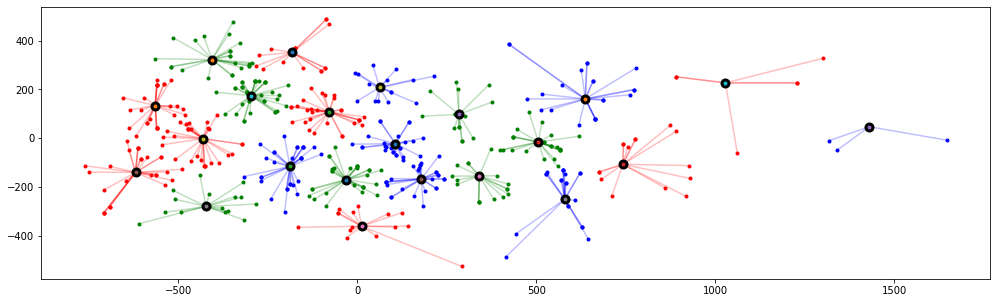

In [51]:
from itertools import cycle
import matplotlib.pyplot as plt

colors = cycle('rgb')
for k, col in zip(range(n_clusters_rs), colors):
    class_members = labels_rs == k
    cluster_center = x_500[cluster_centers_indices_rs[k]]
    plt.plot(x_500[class_members, 0], x_500[class_members, 1], col + '.')
    for x in x_500[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()

In [42]:
## + K-means

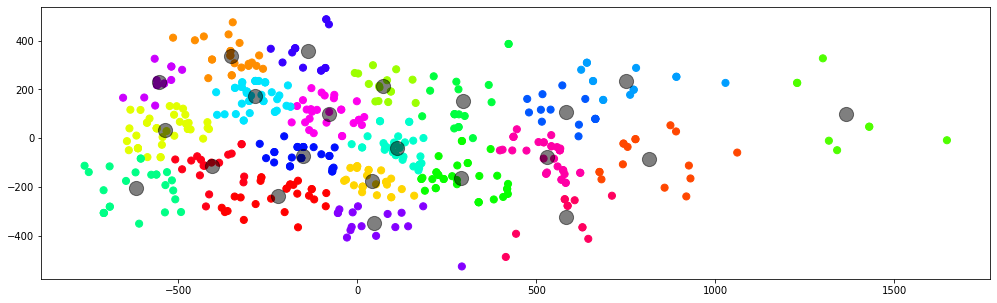

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=22, random_state=0).fit(x_500)
labels_ = kmeans.labels_

plt.scatter(x_500[:, 0], x_500[:, 1], c=y_kmeans, s=50, cmap=plt.cm.hsv)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);